In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

(71000, 3)


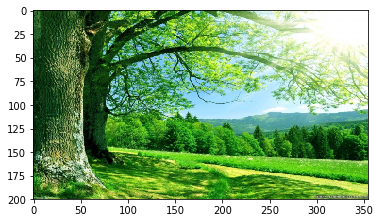

In [2]:
im = cv2.imread('/home/sharad/Pictures/Nature.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

r, c = im.shape[:2]
out_r = 200
im = cv2.resize(im, (int(out_r*float(c) / r), out_r))
pixels = im.reshape((-1, 3))

print pixels.shape
plt.imshow(im)

In [3]:
km = KMeans(n_clusters = 8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
colors

array([[ 38, 106,  26],
       [167, 220, 229],
       [237, 248, 234],
       [106, 171, 143],
       [ 77, 149,  48],
       [ 11,  51,  11],
       [128, 195,  57],
       [188, 221, 132]], dtype=uint8)

In [5]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype = 'float32')
per = per / pixels.shape[0]
per   

array([ 0.1666338 ,  0.07853521,  0.11409859,  0.09049296,  0.15178873,
        0.19094366,  0.11380282,  0.09370423])

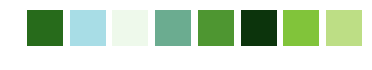

In [6]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix + 1)
    plt.axis("off")
    plt.imshow(patch)

In [7]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key = lambda z: z[0], reverse = True)

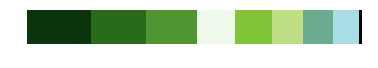

In [8]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end
    
plt.imshow(patch)
plt.show()